In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

In [229]:
df = pd.read_csv("Diabetes_dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


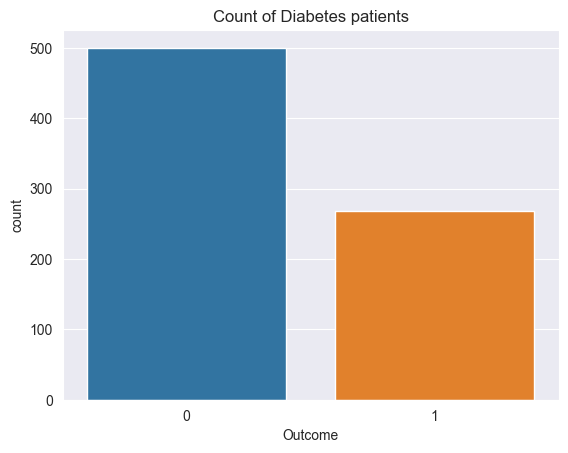

In [230]:
sns.countplot(x=df['Outcome'])
plt.title("Count of Diabetes patients")
plt.show()

In [231]:
x = df.drop("Outcome", axis=1)
y = df["Outcome"]
print(x)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [232]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=30)
x_train.shape, x_test.shape

((537, 8), (231, 8))

In [233]:
# index_i = 0
# index_j = 0
# max = 0.0
# for i in range(50, 300):
#     for j in range(1, 20):
#         model = RandomForestClassifier(random_state=40, n_jobs=1, max_depth=5, n_estimators=i, oob_score=True)
#         model.fit(x_train, y_train)
#         pred = model.predict(x_test)
#         acc = accuracy_score(y_test, pred)
#         if acc > max:
#             max = acc
#             index_i = i
#             index_j = j
#
# print(index_i, index_j, max)
## 87 1 0.7965367965367965

model = RandomForestClassifier(random_state=40, n_jobs=1, max_depth=5, n_estimators=87, oob_score=True)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=87, n_jobs=1, oob_score=True,
                       random_state=40)

In [222]:
# model = RandomForestClassifier(random_state=12)
# params = {'max_depth': [2,3,5,10,20],
#           'min_samples_leaf': [5,10,20,50,100,200],
#           'min_samples_split': [2, 5, 10],
#           'n_estimators': [10,25,30,50,100,200]}
# grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, verbose=1, scoring="accuracy")
# grid_search.fit(x_train, y_train)

In [223]:
# rf_best = grid_search.best_estimator_
# rf_best

In [224]:
# imp_df = pd.DataFrame({"Column": x_train.columns, "Imp": rf_best.feature_importances_})
# imp_df.sort_values(by="Imp", ascending=False)

In [225]:
pred = model.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [226]:
print(mean_absolute_error(y_test, pred))
print(accuracy_score(y_test, pred))

0.20346320346320346
0.7965367965367965


In [227]:
pred_train = model.predict(x_train)
print(accuracy_score(y_train, pred_train))

0.8715083798882681
